# Avocado price prediction

### Imports

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

### Inspecting data

Loading dataset.

In [31]:
df = pd.read_csv('avocado.csv')
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


Dropping index column.

In [32]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [33]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


Checking data formats and missing values.

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
Date            18249 non-null object
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
4046            18249 non-null float64
4225            18249 non-null float64
4770            18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18249 non-null object
year            18249 non-null int64
region          18249 non-null object
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


Converting date column to datetime format

In [35]:
df.Date = pd.to_datetime(df.Date)

### Amount of organic and conventional avocados

Making a countplot to see how many organic and conventional avocados there are in the dataset.

[]

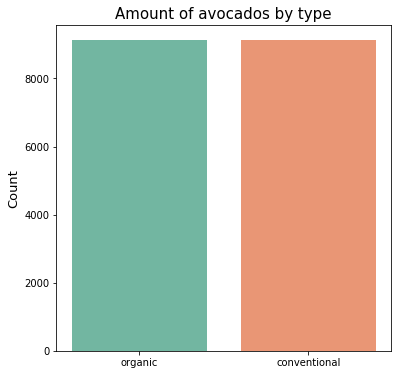

In [36]:
sns.set_palette('Set2')

plt.figure(figsize = (6,6))
sns.countplot(x = 'type', data = df, order = ['organic', 'conventional'])

plt.title('Amount of avocados by type', fontsize = 15)
plt.xlabel('')
plt.ylabel('Count', fontsize = 13)

plt.plot()

There seems to be an even number of both organic and conventional avocado data.

### Average price of avocados lineplot

Making a lineplot of the average price of organic, conventional and total avocados over time.

[]

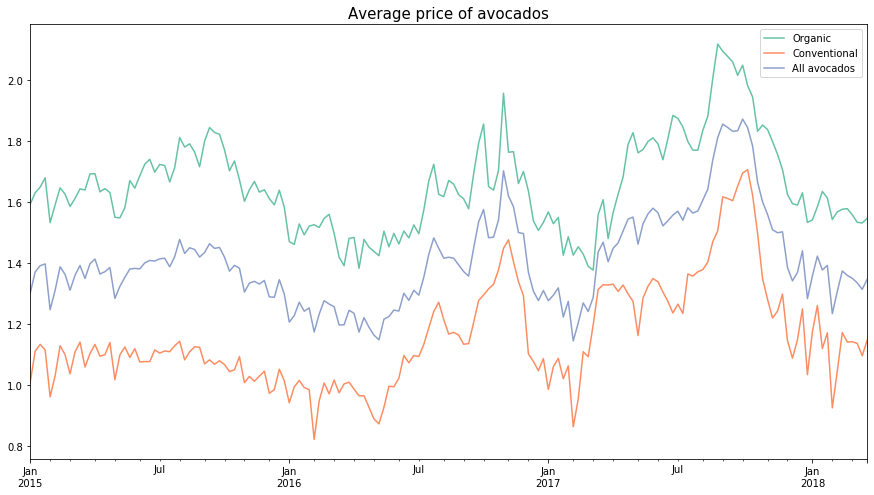

In [37]:
sns.set_palette('Set2')

plt.figure(figsize=(15,8))

avg_by_date = df.groupby('Date').mean()

conventional = df[(df['type'] == 'conventional')]
conventional_avg = conventional.groupby('Date').mean()

organic = df[(df['type'] == 'organic')]
organic_avg = organic.groupby('Date').mean()

organic_avg['AveragePrice'].plot()
conventional_avg['AveragePrice'].plot()
avg_by_date['AveragePrice'].plot()

plt.xlabel('')
plt.legend(['Organic', 'Conventional', 'All avocados'])
plt.title('Average price of avocados', fontsize = 15)

plt.plot()

### Correlation heatmap of dataframe

Renaming number columns.

In [38]:
df = df.rename(columns={'4046': 'Small Hass', '4225': 'Large Hass', '4770': 'XL Hass'})

Extracting month from the Date column and adding it as a new column.

In [39]:
df['Month'] = df['Date'].dt.month

Making a heatmap to see which columns correlate with each other.

[]

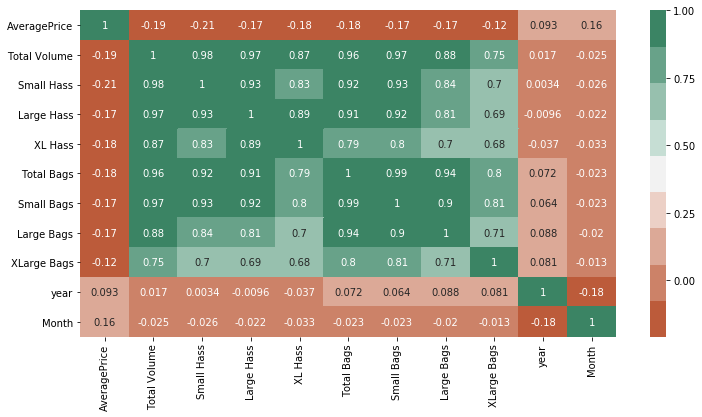

In [40]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), cmap = sns.diverging_palette(23, 150, n=9) ,annot=True)
plt.plot()

### Converting non-numerical values into numerical

In [41]:
df['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

Converting "region" column into numerical data.

In [42]:
df['region'] = df['region'].astype('category').cat.codes

In [43]:
df.head()

,Date,AveragePrice,Total Volume,Small Hass,Large Hass,XL Hass,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,0,12
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,0,12
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,0,12
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,0,12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,0,11


Converting "type" column into numerical data.

In [44]:
df['type'].unique()

array(['conventional', 'organic'], dtype=object)

In [45]:
type_dict = {'conventional' : 1, 'organic' : 2}

df['type'] = df['type'].map(type_dict)

In [46]:
df.head()

,Date,AveragePrice,Total Volume,Small Hass,Large Hass,XL Hass,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,1,2015,0,12
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,1,2015,0,12
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,1,2015,0,12
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,1,2015,0,12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,1,2015,0,11


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
Date            18249 non-null datetime64[ns]
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
Small Hass      18249 non-null float64
Large Hass      18249 non-null float64
XL Hass         18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18249 non-null int64
year            18249 non-null int64
region          18249 non-null int8
Month           18249 non-null int64
dtypes: datetime64[ns](1), float64(9), int64(3), int8(1)
memory usage: 1.8 MB


### Creating model

Defining the dependent and independent variables and doing a train test split.

In [48]:
X = df[['Total Volume', 'type', 'region', 'Small Hass', 'Large Hass', 'XL Hass', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year', 'Month']]
y = df['AveragePrice']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

### Decision tree

In [49]:
from sklearn.tree import DecisionTreeRegressor
DTR = DecisionTreeRegressor()
DTR.fit(X_train,y_train)
predict = DTR.predict(X_test)

Printing MAE, MSE and RMSE

In [50]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_test, predict))
print(metrics.mean_squared_error(y_test, predict))
print(np.sqrt(metrics.mean_squared_error(y_test, predict)))

0.12537584922200304
0.03798091168091168
0.19488692024071724


Plotting the decision tree model.

[]

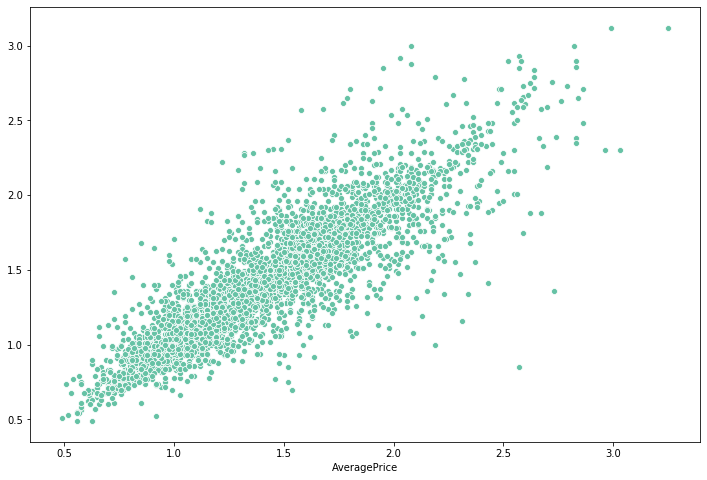

In [51]:
plt.figure(figsize=(12,8))
sns.scatterplot(x = y_test, y = predict)
plt.plot()

### Random forest

In [52]:
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor()
RFR.fit(X_train,y_train)
predict=RFR.predict(X_test)

D:\Pelit\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [53]:
print(metrics.mean_absolute_error(y_test, predict))
print(metrics.mean_squared_error(y_test, predict))
print(np.sqrt(metrics.mean_squared_error(y_test, predict)))

0.10008590839360071
0.020735975016436554
0.14399991325148967


Making a plot to see how the prediction is distributed.

[]

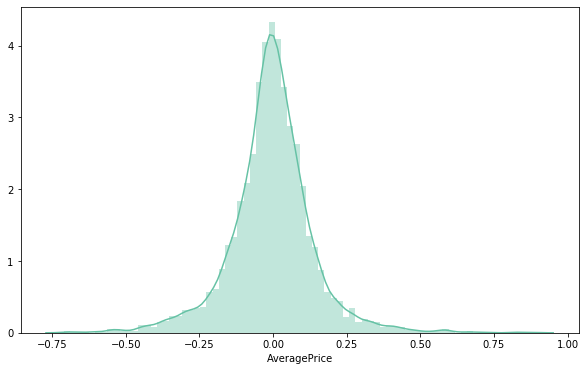

In [54]:
plt.figure(figsize=(10,6))
sns.distplot((y_test-predict), bins = 76)
plt.plot()

Creating a new dataframe using the prediction data.

In [55]:
data = pd.DataFrame({'Average Price prediction' : y_test , 'Prediction' : predict}, columns = ['Average Price prediction','Prediction'])
data.head()

,Average Price prediction,Prediction
8604,0.82,0.973
2608,0.97,1.032
14581,1.44,1.479
4254,0.97,0.904
16588,1.45,1.438


Making a regression plot to visualize the Random Forest avocado price prediction.

[]

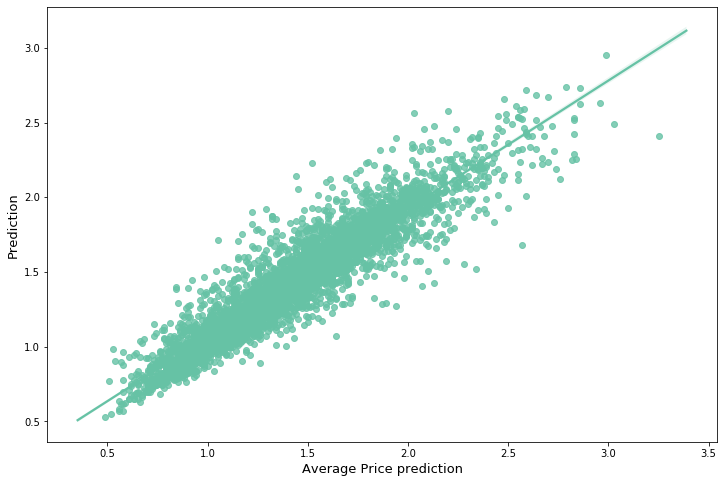

In [56]:
plt.figure(figsize=(12,8))
sns.regplot(x = 'Average Price prediction', y = 'Prediction', data = data)
plt.xlabel('Average Price prediction', fontsize = 13)
plt.ylabel('Prediction', fontsize = 13)
plt.plot()